<img style="float: left;" src="images/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2023 Automne</center>

<center>September 28, 2023</center>

#### *Instructions :*  

* This TP should be completed and uploaded on Moodle before **Thursday 12 October 2023, 23h59**.
* The name of the file you upload should be **TP1_name_surname.ipynb**.
* If you need to include attached files to you TP (images, python files, ...), please archive them together in a **ZIP** folder named **TP1_name_surname.zip**.

### Exercise 1 : Color Channels
*(1 point)*

Read the image *colors.jpg*.  

(a) Display the original image using *matplotlib*.

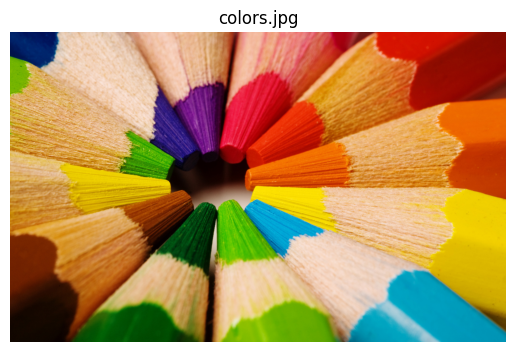

In [1]:
import matplotlib.pyplot as plt

image = plt.imread('./images/colors.jpg')

plt.figure()
plt.title("colors.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()

(b) On a 1x3 subplot, display the three color components separately using correctly chosen colormaps.  
(That is, 'Reds_r' for red, 'Greens_r' for green and 'Blues_r' for blue)

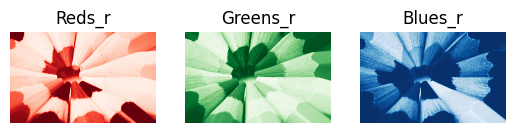

In [2]:
colors = ['Reds_r', 'Greens_r', 'Blues_r']

plt.figure()
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(image[:,:,i], cmap=colors[i])
    plt.axis('off')
    plt.title(colors[i])
plt.show()
    

(c) On 1x3 subplot, display three images:
1. fill original image's first channel with zeros

2. fill original image's second channel with zeros

3. fill original image's third channel with zeros

Explain the results

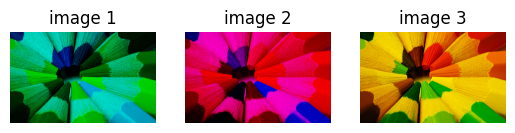

In [3]:
plt.figure()

for i in range(3):
    plt.subplot(1, 3, i+1)
    newimage = image.copy()
    newimage[:, :, i] = 0
    plt.imshow(newimage)
    plt.axis('off')
    plt.title(f'image {i + 1}')
plt.show()


(d) To transform an RGB image to grayscale, you need to take a weighted average of the different color channels :

$$grayscale = 0.2989 \times R + 0.5870 \times G + 0.1140 \times B$$

where, R,G,B are the red blue and green channels extracted (sliced) from the image.



1. Implement this operation using *Numpy* @ operator between the original image and the weight vector

$$w = [0.2125, 0.7154, 0.0721]$$

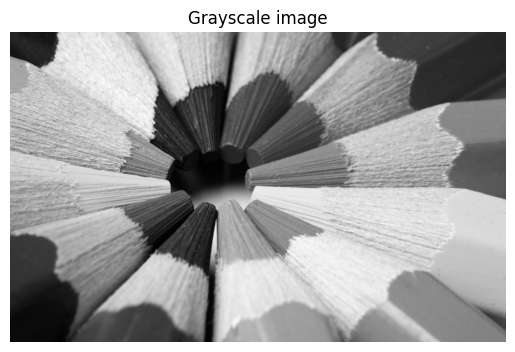

In [4]:
w = [0.2125, 0.7154, 0.0721]

grayscale = image @ w

plt.figure()
plt.imshow(grayscale, cmap='gray')
plt.axis('off')
plt.title("Grayscale image")
plt.show()

2. Obtain the same result by using the function *skimage.color.rgb2gray()*. Display it.

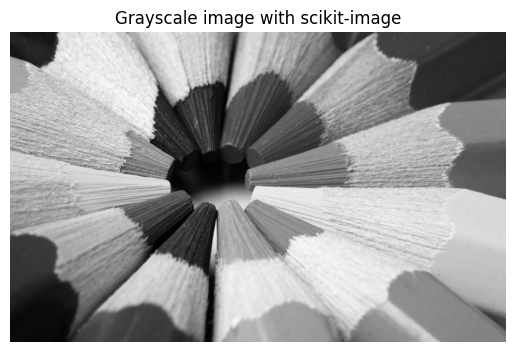

In [5]:
import skimage as sk

newimage = sk.color.rgb2gray(image)

plt.figure()
plt.imshow(newimage, cmap='gray')
plt.axis('off')
plt.title("Grayscale image with scikit-image")
plt.show()

3. Compute singlechannel image by performing simple averaging of the color channels. Display it.

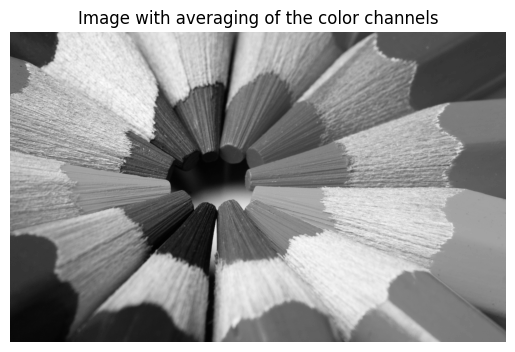

In [6]:
average_channels = image[:,:,0]/3 + image[:,:,1]/3 + image[:,:,2]/3

plt.figure()
plt.imshow(average_channels, cmap='gray')
plt.axis('off')
plt.title("Image with averaging of the color channels")
plt.show()

3. Compare the images, that you have obtained. Explain the differences and similarities in results.

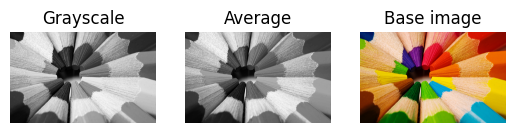

In [7]:
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(grayscale, cmap='gray')
plt.title("Grayscale")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(average_channels, cmap='gray')
plt.title("Average")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(image)
plt.title("Base image")
plt.axis('off')
plt.show()

We can see that the image obtained with the average of colors channels is very similar to the image obtained with normal grayscale. However, there are some differencies...
For instance, all the greens pencils are more dark in the 'Average' than in the 'Grayscale' image. It's similar for the yellow and it's normal because the yellow is a mix between red
and green. And the red looks like less dark in the 'Average' than in the 'Grayscale', like the blue... So I suppose that with the normal average of the colors channels, we
obtain a more dark green and less dark red and blue... It's perhaps because the grayscale method is made with the knowledge of the imperfections of human's eyes...

(e) On a 1x3 subplot, display the three histograms of the three color components separately (you may want to use the function plt.hist())

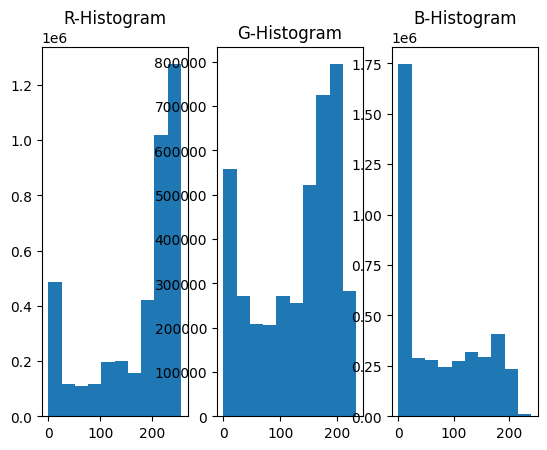

In [8]:
plt.figure()
titles = ["R-Histogram", "G-Histogram", "B-Histogram"]
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(image[:,:,i].reshape(-1), )
    plt.title(titles[i])
plt.show()

### Exercise 2 : Numpy matrices

*(1 point)*

(a) Using *Numpy*, generate a gradient image like the one represented below :

<img src="images/grad.png" alt="drawing" width="400"/>

* Its shape should be $[125, 500]$
* Its dynamic range should be 0 to 255 encoded in a UINT8 array

and display it using *matplotlib*.

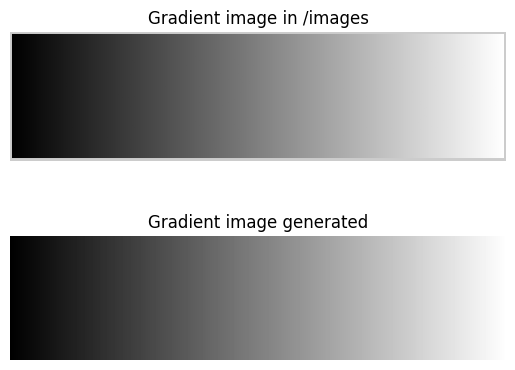

In [9]:
import numpy as np

gradient = np.linspace(0, 255, 500, dtype=np.uint8)
gradient = np.tile(gradient, (125, 1))


plt.figure()

grad = plt.imread("./images/grad.png")

plt.subplot(2, 1, 1)
plt.imshow(grad)
plt.title("Gradient image in /images")
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(gradient, cmap='gray')
plt.title("Gradient image generated")
plt.axis('off')
plt.show()

(b) Generate the images that are represented below using Numpy arrays of shape [2,2] and dtype boolean. Visualize the results on a $1 \times 3$ grid.

<img src="images/black_and_white.png" alt="drawing" width="800"/>

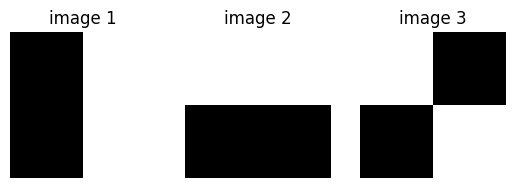

In [10]:
im_1 = np.array([[0, 255], [0, 255]])
im_2 = np.array([[255, 255], [0, 0]])
im_3 = np.array([[255, 0], [0, 255]])

ims = [im_1, im_2, im_3]

plt.figure()

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(ims[i], cmap='gray')
    plt.axis('off')
    plt.title(f'image {i + 1}')
plt.show()

(c) Find a way to write the third array as a combination of the first two using *numpy* operators (addition, multiplication, *np.bitwise_and()*, *np.bitwise_not(), ...*)

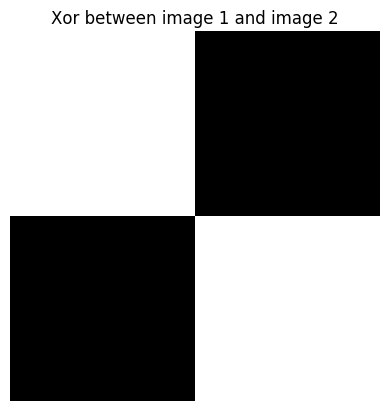

In [11]:
test = np.bitwise_xor(im_1, im_2)
plt.figure()

plt.imshow(test, cmap='gray')
plt.axis('off')
plt.title("Xor between image 1 and image 2")
plt.show()

(d) By correctly using color channels, only manipulating the gradient image you produced in (a), and the functions

* *np.stack()*
* *np.zeros_like()*

Produce the following image :

<img src="images/color_grad.png" alt="drawing" width="400"/>

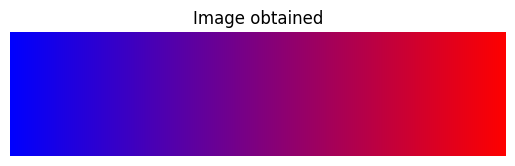

In [12]:
red = gradient.copy()
green = np.zeros_like(gradient)
blue = np.flip(gradient)

im = np.stack((red, green, blue), axis=2)

plt.figure()
plt.imshow(im)
plt.axis('off')
plt.title("Image obtained")
plt.show()

---

### Exercise 3 : Numpy operators
*(1 point)*

(a) Read the image *lena.png* and display it. What is its dtype ? its dynamic range ? How many color channels does it have ?

Data type: float32
Shape: (512, 512, 3)
Dynamic range: 0.9882353


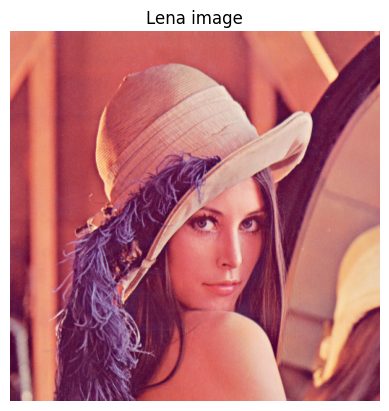

In [13]:
lena = plt.imread("./images/lena.png")
print("Data type: " + str(lena.dtype))
print("Shape: " + str(lena.shape))
print("Dynamic range: " + str(np.max(lena) - np.min(lena)))


plt.figure()
plt.imshow(lena)
plt.axis('off')
plt.title("Lena image")
plt.show()

(b) Compute the MSE (L2 distance) between the two grayscale images (any two grayscale images from Ex. 1.d) by using *np.linalg.norm()*. Comment on the value.

In [14]:
print(np.linalg.norm(grayscale - average_channels))
print(np.linalg.norm(grayscale - grayscale))


45057.78973805483
0.0


We obtain bigger values if the two images are very different.

(c) On the grayscale image, crop the face of Lena using a rectangle with coordinates :

* Top-left (150, 100)
* Down-right (375, 380)

By using *Numpy* array slicing

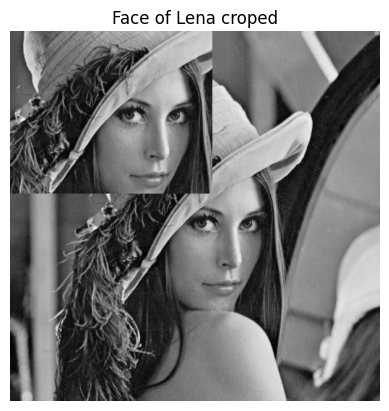

In [15]:
graylena = lena @ w
crop = graylena.copy()
crop [0:225, 0:280] = graylena[150:375, 100:380]
plt.figure()

plt.imshow(crop, cmap='gray')

plt.axis('off')
plt.title("Face of Lena croped")
plt.show()


(d) Normalize the RGB _lena.png_ image. First convert image to _np.float32_ and scale to _[0, 1]_ dynamic range, then substract _0.5_ from each color channel and divide each channel by _0.5_. Use Numpy scalar on matrix operations.

float32
Dynamic range of Lena: 0.9882353
float32
Dynamic range of Lena: 1.0


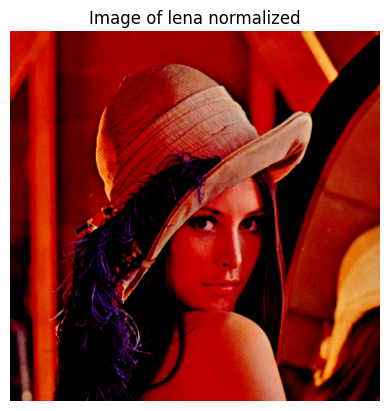

In [16]:
print(lena.dtype)
print("Dynamic range of Lena: " + str(np.max(lena) - np.min(lena)))

newlena = lena.copy()

newlena = (newlena - 0.5)/0.5

newlena[newlena < 0] = 0

print(newlena.dtype)
print("Dynamic range of Lena: " + str(np.max(newlena) - np.min(newlena)))

plt.figure()
plt.imshow(newlena)
plt.axis('off')
plt.title("Image of lena normalized")
plt.show()

### Exercise 4 : Gaussian noise
*(1 point)*

Read the image *lena.png* and convert it to grayscale. Ensure that it has dtype _np.float32_ with dynamic range _[0, 1]_. 

Data type float32
Dynamic range: 0.892889


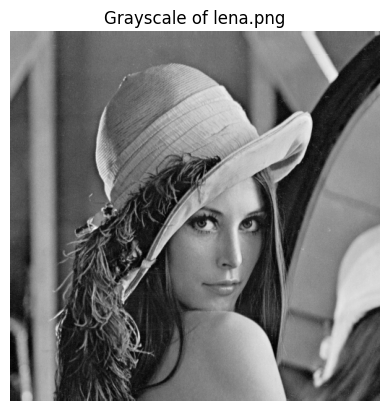

In [17]:
graylena = lena @ w
graylena = np.float32(graylena)
print("Data type", str(graylena.dtype))
print("Dynamic range: " + str(np.max(graylena) - np.min(graylena)))

plt.figure()

plt.imshow(graylena, cmap='gray')
plt.axis('off')
plt.title("Grayscale of lena.png")
plt.show()

(a) Define a *Numpy* array of same shape as the image, with each entry randomly sampled from a Gaussian distribution $\mathcal{N}(0, \sigma^2)$ with $\sigma = 0.01, 0.3, 0.5$.

Hint : Use *np.random.randn()* function

In [18]:
sigma = [0.01, 0.3, 0.5]

randomly = []

for i in range(3):
    randomly.append(np.float32(sigma[i] * np.random.randn(graylena.shape[0], graylena.shape[1])))

print(randomly[0].dtype)

float32


(b) Add this noise to the grayscale image using numpy array addition and visualise the results on a 1x3 subplot.

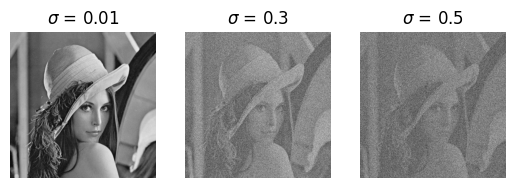

In [19]:
plt.figure()

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(graylena + randomly[i], cmap='gray')
    plt.axis('off')
    plt.title(f'$\sigma$ = {sigma[i]}')
plt.show()

(c) Redo the preceding step using the function *skimage.util.random_noise()* with parameter *clip=True*.

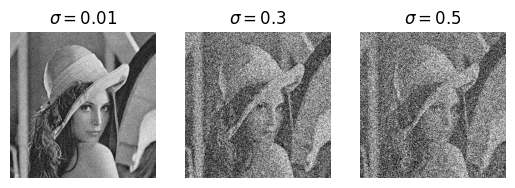

In [20]:
plt.figure()

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(sk.util.random_noise(graylena, mode='gaussian', clip=True, var=sigma[i]), cmap='gray')
    plt.axis('off')
    plt.title(f'$\sigma = {sigma[i]}$')
plt.show()

(d) Explain why, for the same $\sigma$, the two methods yield different visual results.

--- Write your answer here ---

The second method seems to be more noisy...

### Exercise 5 : Salt & Pepper Noise

*(1 point)*

Read the image *lena.png* and convert it to grayscale. Make sure that it has dtype float with dynamic range [0,1]. 

Data type float32
Dynamic range: 0.892889


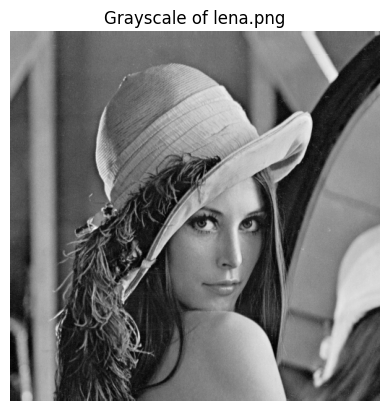

In [21]:
graylena = lena @ w
graylena = np.float32(graylena)
print("Data type", str(graylena.dtype))
print("Dynamic range: " + str(np.max(graylena) - np.min(graylena)))

plt.figure()

plt.imshow(graylena, cmap='gray')
plt.axis('off')
plt.title("Grayscale of lena.png")
plt.show()

(a) Using *skimage.util.random_noise()* add the Salt & Pepper noise with density 

$$\rho = 0.01, 0.1, 0.5$$

and display the results.

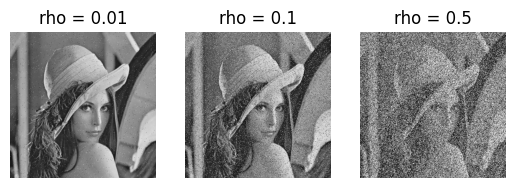

In [22]:
rho = [0.01, 0.1, 0.5]

plt.figure()

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(sk.util.random_noise(graylena, mode='s&p', clip=True, amount=rho[i]), cmap='gray')
    plt.axis('off')
    plt.title(f'rho = {rho[i]}')
plt.show()

(b) Explain the differences between the Gaussian noise and the S&P noise. Which one do you think is harder to remove ? Why ?

--- Write your answer here ---
The difference between the two methods is that the gaussian noise seems to be a more dirty noise... But the salt and pepper noise seems to be an exponential noise... So I think that it's
harder to remove the salt and pepper noise...

(c) Write your own function that adds salt and pepper noise to the image. As inputs the function should take: input image - np.ndarray, p - percentage of the pixels to be replaced with noise. Make sure that your function works with singlechannel and multichannel images

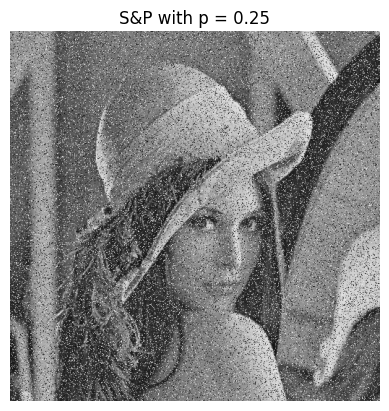

In [27]:
import random

def add_salt_and_pepper(im_input: np.ndarray, p: float):
    if im_input.shape[2] == 3:
        img = sk.color.rgb2gray(im_input)
    else:
        img = im_input
    rows, columns = img.shape
    random = np.random.binomial(1, 1 - p, (rows, columns))
    img = img * random
    for i in np.arange(rows):
        for j in np.arange(columns):
            if img[i, j] == 0:
                img[i, j] = np.random.random()
    random_tab = np.random.rand(rows, columns)
    random_tab = random * random_tab

    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'S&P with p = {p}')
    plt.show()
    
add_salt_and_pepper(lena, 0.25)        

---

### Exercise 6 : Mean and variance

*(1 point)*

Read the image *lena.png* and convert it to grayscale. Make sure that it has dtype _np.float32_ with dynamic range _[0, 1]_.

(a) Compute the global mean and the global variance of the image using *np.mean()* and *np.std()*

In [28]:
print("Data type: " + str(graylena.dtype))
print("Dynamic range: " + str(np.max(graylena) - np.min(graylena)))

print("Mean: " + str(np.mean(graylena)))
print("Variance: " + str(np.std(graylena)))

Data type: float32
Dynamic range: 0.892889
Mean: 0.45787778
Variance: 0.19380367


Read the image *lena.png* as RGB image. Make sure that it has dtype _np.float32_ with dynamic range _[0, 1]_.

(b) Compute the global mean and the global variance of each image channel using *np.mean()* and *np.std()*. 

_Hint_: use _axis_ parameter in _np.mean()_ and _np.std()_ functions

In [29]:
print("Data type: " + str(lena.dtype))
print("Dynamic range: " + str(np.max(lena) - np.min(lena)))
print("Mean R: " + str(np.mean(lena[::, ::, 0])))
print("Mean G: " + str(np.mean(lena[::, ::, 1])))
print("Mean B: " + str(np.mean(lena[::, ::, 2])))
print("Variance R: " + str(np.std(lena[::, ::, 0])))
print("Variance G: " + str(np.std(lena[::, ::, 1])))
print("Variance B: " + str(np.std(lena[::, ::, 2])))

Data type: float32
Dynamic range: 0.9882353
Mean R: 0.70675945
Mean G: 0.38843617
Mean B: 0.41337365
Variance R: 0.19234812
Variance G: 0.20736282
Variance B: 0.1335605


(c) Compute the local mean and variance of the image for a window size $5 \times 5$ with splitting
steps 1 and 3. Display the obtained results as new (smaller) images. Explain the change
in the image size and give an interpretation of the results, from an image processing point
of view.

*Hint :* You may use the function *view_as_windows()* from *skimage.util.shape* package.

*Note :* do not use cycle, use Numpy array operations

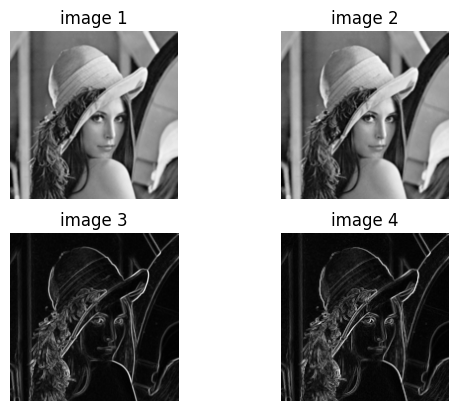

In [38]:
image_1 = sk.util.shape.view_as_windows(graylena, window_shape=(5, 5), step=1)
image_2 = sk.util.shape.view_as_windows(graylena, window_shape=(5, 5), step=3)

im_1 = np.mean(image_1, axis=(2, 3))
im_2 = np.mean(image_2, axis=(2, 3))
im_3 = np.std(image_1, axis=(2, 3))
im_4 = np.std(image_2, axis=(2, 3))

images = [im_1, im_2, im_3, im_4]

plt.figure()

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(f'image {i + 1}')

plt.show()



plt.show()